In [12]:
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger

In [13]:
from nltk.stem.porter import PorterStemmer

In [14]:
import pandas as pd
import textstat
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from sklearn.linear_model import Ridge
import datetime as dt
from sklearn.metrics import r2_score
import seaborn as sns
from scipy import stats

In [15]:
path_business="D:/Trinity_DS/Dissertations/201907/dataset_v2/Business_Toronto_Restaurant.csv"
path_review="D:/Trinity_DS/Dissertations/201907/dataset_v2/Review_Toronto_Restaurant.csv"
path_user="D:/Trinity_DS/Dissertations/201907/dataset_v2/User_Toronto_Restaurant.csv"

In [16]:
df_business = pd.read_csv(path_business,low_memory=False)

In [17]:
df_review = pd.read_csv(path_review,low_memory=False,encoding='iso-8859-1')
df_user = pd.read_csv(path_user,low_memory=False,encoding='iso-8859-1')

In [18]:
df_business=df_business.drop(df_business.columns[0], axis=1)
df_business.head()

,neighborhood,city,state,postal_code,latitude,longitude,stars,review_count,is_open,Food,...,dinner,breakfast,brunch,dairy-free,gluten-free,vegan,kosher,halal,soy-free,vegetarian
0,Yonge and Eglinton,Toronto,ON,M4P 2H6,43.71140,-79.39934,3.0,12,0,0,...,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Leslieville,Toronto,ON,M4M 3A6,43.66926,-79.33590,3.5,39,1,0,...,True,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Toronto,ON,M3J 3K5,43.78182,-79.49043,5.0,3,1,0,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Toronto,ON,M5S 1H6,43.66158,-79.40888,4.0,55,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Toronto,ON,M3J 1P3,43.77488,-79.49462,3.0,5,1,1,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df_business.describe()

,latitude,longitude,stars,review_count,is_open,Food,Nightlife,Bars,Canadian (New),Sandwiches,...,American (Traditional),Indian,Middle Eastern,Thai,Mediterranean,Asian Fusion,Mexican,Korean,Seafood,RestaurantsPriceRange2
count,7148.000000,7148.000000,7148.000000,7148.000000,7148.000000,7148.000000,7148.000000,7148.000000,7148.000000,7148.000000,...,7148.000000,7148.000000,7148.000000,7148.000000,7148.000000,7148.000000,7148.000000,7148.000000,7148.000000,6499.000000
mean,43.681280,-79.392130,3.423475,42.495383,0.695020,0.206771,0.131505,0.126889,0.087997,0.086598,...,0.045467,0.040711,0.038472,0.038472,0.037213,0.037073,0.033996,0.033436,0.031757,1.824127
std,0.046416,0.061094,0.741883,73.356545,0.460431,0.405018,0.337976,0.332871,0.283310,0.281264,...,0.208341,0.197633,0.192347,0.192347,0.189297,0.188955,0.181230,0.179785,0.175365,0.640288
min,43.589600,-79.703390,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,43.650950,-79.417725,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,43.664115,-79.393495,3.500000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,43.696838,-79.373350,4.000000,48.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,43.876500,-79.137540,5.000000,1494.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [20]:
df_review=df_review.drop(df_review.columns[0], axis=1)
df_review.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,ymAUG8DZfQcFTBSOiaNN4w,u0LXt3Uea_GidxRW1xcsfg,9_CGhHMz8698M9-PkVf0CQ,4,5/11/2012,Who would have guess that you would be able to...,0,0,2
1,w41ZS9shepfO3uEyhXEWuQ,u0LXt3Uea_GidxRW1xcsfg,5r6-G9C4YLbC7Ziz57l3rQ,3,2/9/2013,"Not bad!! Love that there is a gluten-free, ve...",1,0,0
2,PIsUSmvaUWB00qv5KTF1xA,u0LXt3Uea_GidxRW1xcsfg,z8oIoCT1cXz7gZP5GeU5OA,4,5/1/2013,This is currently my parents new favourite res...,1,0,0
3,PdZ_uFjbbkjtm3SCY_KrZw,u0LXt3Uea_GidxRW1xcsfg,XWTPNfskXoUL-Lf32wSk0Q,3,9/28/2011,Server was a little rude.\r\n\r\nOrdered the c...,5,0,1
4,lsoSqIrrDbQvWpMvsSj2xw,u0LXt3Uea_GidxRW1xcsfg,RtUvSWO_UZ8V3Wpj0n077w,3,12/3/2012,Wanted to check out this place due to all the ...,2,1,1


In [21]:
df_user=df_user.drop(df_user.columns[0], axis=1)
df_user.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,--Br-QsbO9ad5GbZxVGxaw,Melanie,12,2015-06-10 00:58:00,21,5,2,NaN,None,0,...,0,0,0,0,0,0,0,0,0,0
1,--BumyUHiO_7YsHurb9Hkw,Sapna,76,2017-01-13 13:32:40,43,8,13,"2017,2018","YtdOIvYescf0uFTgg5owJw, GGI39_EL1ERSqyWX1tEjMA...",1,...,1,0,0,0,0,2,0,0,1,0
2,--DKDJlRHfsvufdGSk_Sdw,Tony,1,2016-07-25 06:14:00,0,0,0,NaN,None,0,...,0,0,0,0,0,2,0,0,0,0
3,--KQJPdrU0Md97DiOliDzw,Steve,166,2006-01-17 19:00:28,306,148,176,"2009,2010,2011","EnZb0blM78cUkBLfeivJaQ, C-uhHcfU7Iat9NEx726_fQ...",6,...,6,2,1,4,18,26,41,41,18,12
4,--nIqAJNHk0kc2_uFJ7LMA,Mark,1,2012-06-26 22:01:35,1,0,0,NaN,"4TU0b-4_AT_KWKEP7-Qzwg, GuKDVWftscPZ1CT9CcihUA...",1,...,0,0,0,0,0,1,0,0,0,0


In [22]:
analysis_df = pd.DataFrame()

In [39]:
#textstat.flesch_reading_ease(.id)
readablity = []
for text in df_review['text']:
    readablity.append(textstat.flesch_reading_ease((text)))
analysis_df['flesch_reading_ease']=readablity

In [24]:
smog = []
for text in df_review['text']:
    smog.append(textstat.smog_index(text))

In [25]:
coleman_liau=[]
for text in df_review['text']:
    coleman_liau.append(textstat.coleman_liau_index(text))


In [26]:
sentence_count=[]
for text in df_review['text']:
    sentence_count.append(textstat.sentence_count(text))

In [27]:
gunning_fog=[]
for text in df_review['text']:
    gunning_fog.append(textstat.gunning_fog(text))

In [28]:
flesch_kincaid_grade=[]
for text in df_review['text']:
    flesch_kincaid_grade.append(textstat.flesch_kincaid_grade(text))

In [40]:
subjectivity_list=[]
polarity_list=[]
for text in df_review['text']:
    subjectivity_list.append(TextBlob(text).sentiment.subjectivity)
    polarity_list.append(TextBlob(text).sentiment.polarity)

In [30]:
analysis_df['smog']=smog
analysis_df['coleman_liau']=coleman_liau
analysis_df['sentence_count']=sentence_count
analysis_df['gunning_fog']=gunning_fog
analysis_df['flesch_kincaid_grade']=flesch_kincaid_grade
analysis_df['subjectivity']=subjectivity_list
analysis_df['polarity']=polarity_list

In [36]:
analysis_df.head()

,flesch_reading_ease,smog,coleman_liau,sentence_count,gunning_fog,flesch_kincaid_grade,subjectivity,polarity,stars,useful,agg,usefull_bin
0,52.16,12.5,9.41,3,16.90,14.9,0.511420,0.511420,4,0,2,0
1,75.03,0.0,8.88,2,10.46,8.1,0.583333,0.583333,3,1,1,1
2,80.62,8.2,6.38,5,7.90,6.0,0.484848,0.484848,4,1,1,1
3,66.74,0.0,10.14,2,8.28,7.2,0.480000,0.480000,3,5,6,1
4,77.37,9.7,6.50,6,9.42,7.2,0.651389,0.651389,3,2,4,1


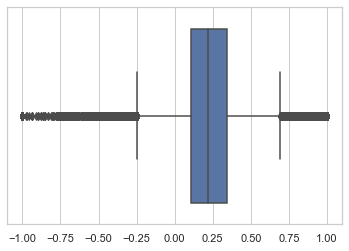

In [42]:


import matplotlib.pyplot as plt

sns.boxplot(x=polarity_list)
plt.savefig('boxplots/yelp_polarity.png')


In [32]:
analysis_df['stars']=df_review['stars']
analysis_df['useful']=df_review['useful']
analysis_df['agg']=df_review['useful']+df_review['funny']+df_review['cool']
analysis_df['usefull_bin'] = np.where(analysis_df['useful']==0, '0', '1')

In [33]:
analysis_df['stars']=df_review['stars']

In [34]:
analysis_df.dtypes
analysis_df.groupby('usefull_bin').count()
analysis_df.to_csv("D:/Trinity_DS/Dissertations/201907/yelp/analysis.csv",index=False)
#analysis_df.groupby('usefull_bin').mean()
#analysis_df.groupby('usefull_bin').var()

In [ ]:
X= np.array(analysis_df.drop(['usefull_bin','agg','useful'], axis=1))
#X= np.array(analysis_df['smog'])
Y= np.array(analysis_df['usefull_bin'])
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=303)
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

# Decision Tree

In [124]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)
Y_train_Pred=clf.predict(X_train_scaled)
accuracy_score(y_train, Y_train_Pred)

0.9999519466415507

In [115]:
Y_test_Pred=clf.predict(X_test_scaled)
target_names = ['0', '1']
print(classification_report(y_test, Y_test_Pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60     28694
           1       0.49      0.49      0.49     22555

    accuracy                           0.55     51249
   macro avg       0.54      0.54      0.54     51249
weighted avg       0.55      0.55      0.55     51249



# Support Vector Machines

In [618]:
list(analysis_df)
list(analysis_df)

['flesch_reading_ease',
 'smog',
 'coleman_liau',
 'sentence_count',
 'gunning_fog',
 'flesch_kincaid_grade',
 'subjectivity',
 'polarity',
 'stars',
 'useful',
 'agg',
 'usefull_bin',
 'date',
 'diff_days',
 'usefull_diff']

In [622]:
list(analysis_df)
X= np.array(analysis_df.drop(['usefull_bin','agg','useful','date','usefull_diff'], axis=1))
#X= np.array(analysis_df['smog'])
Y= np.array(analysis_df['usefull_bin'])
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=303)
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [623]:
clf_SVM = SVC(gamma='auto',kernel='rbf',C=10)
clf_SVM.fit(X_train_scaled, y_train) 

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [624]:
Y_train_Pred=clf_SVM.predict(X_train_scaled)
accuracy_score(y_train, Y_train_Pred)

0.6715072416411183

In [625]:
Y_test_SVM_Pred=clf_SVM.predict(X_test_scaled)
Y_test_SVM_Pred
target_names=['0','1']
print(classification_report(y_test, Y_test_SVM_Pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73     28694
           1       0.67      0.51      0.58     22555

    accuracy                           0.67     51249
   macro avg       0.67      0.65      0.65     51249
weighted avg       0.67      0.67      0.66     51249



# Random Forest

In [627]:
clf_RF = RandomForestClassifier(n_estimators=100,random_state=0)
clf_RF.fit(X_train_scaled, y_train)
Y_test_RF_Pred=clf_RF.predict(X_test)
print("Training Accuracy",accuracy_score(y_train, Y_train_Pred))
target_names=['0','1']
print(classification_report(y_test, Y_test_RF_Pred, target_names=target_names))

Training Accuracy 0.6715072416411183
              precision    recall  f1-score   support

           0       0.71      0.00      0.00     28694
           1       0.44      1.00      0.61     22555

    accuracy                           0.44     51249
   macro avg       0.57      0.50      0.31     51249
weighted avg       0.59      0.44      0.27     51249



In [629]:
clf_RF = RandomForestClassifier(n_estimators=1000,random_state=0,max_depth=4)
clf_RF.fit(X_train_scaled, y_train)
Y_test_RF_Pred=clf_RF.predict(X_test)
print("Training Accuracy",accuracy_score(y_train, Y_train_Pred))
target_names=['0','1']
print(classification_report(y_test, Y_test_RF_Pred, target_names=target_names))

Training Accuracy 0.6715072416411183


D:\Installed_Applications\Anaconda\envs\Yelp\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     28694
           1       0.44      1.00      0.61     22555

    accuracy                           0.44     51249
   macro avg       0.22      0.50      0.31     51249
weighted avg       0.19      0.44      0.27     51249



In [147]:
clf_RF = RandomForestClassifier(n_estimators=2000,random_state=0
clf_RF.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [148]:
Y_train_Pred=clf_RF.predict(X_train_scaled)
accuracy_score(y_train, Y_train_Pred)

0.9999519466415507

In [149]:
Y_test_RF_Pred=clf_RF.predict(X_test)
target_names=['0','1']
print(classification_report(y_test, Y_test_RF_Pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     28694
           1       0.44      1.00      0.61     22555

    accuracy                           0.44     51249
   macro avg       0.22      0.50      0.31     51249
weighted avg       0.19      0.44      0.27     51249



# Regression Analysis

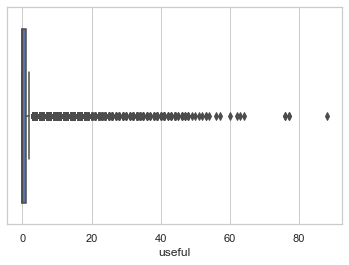

In [663]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=analysis_df["useful"])


['flesch_reading_ease', 'smog', 'coleman_liau', 'sentence_count', 'gunning_fog', 'flesch_kincaid_grade', 'subjectivity', 'polarity', 'stars', 'useful', 'agg', 'usefull_bin', 'date', 'diff_days', 'usefull_diff', 'log_usefull']
flesch_reading_ease     float64
smog                    float64
coleman_liau            float64
sentence_count            int64
gunning_fog             float64
flesch_kincaid_grade    float64
subjectivity            float64
polarity                float64
stars                     int64
useful                    int64
agg                       int64
usefull_bin              object
date                     object
diff_days               float64
usefull_diff            float64
log_usefull             float64
dtype: object


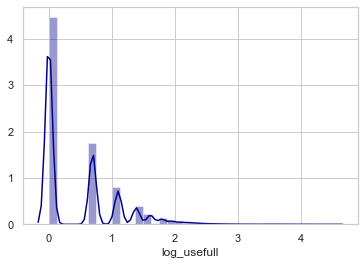

In [689]:
print(list(analysis_df))
analysis_df['log_usefull']=np.log(analysis_df['useful']+1)
print(analysis_df.dtypes)
sns.distplot(analysis_df["log_usefull"],bins=int(180/5),  hist=True, kde=True, color = 'darkblue', 
            )

In [670]:
analysis_df['date'] =  pd.to_datetime(df_review['date']).dt.date
#filtered_df = data_df[data_df['reviews_dateAdded_Date_time'].notnull()]
#filtered_df = data_df[data_df['reviews_date_Date_time'].notnull()]
#analysis_df['date']-dt.datetime.now().date()-

In [688]:
analysis_df['diff_days'] = dt.datetime.now().date() - analysis_df['date']
analysis_df['diff_days']=(analysis_df['diff_days']/np.timedelta64(1,'M'))


analysis_df['usefull_diff'] = (analysis_df['useful']/analysis_df['diff_days'])
analysis_df['usefull_diff'].describe()
#usefull_diff

count    155300.000000
mean          0.020927
std           0.061873
min           0.000000
25%           0.000000
50%           0.000000
75%           0.026261
max           3.580809
Name: usefull_diff, dtype: float64

In [672]:
analysis_df['diff_days'] = dt.datetime.now().date() - analysis_df['date']
analysis_df['diff_days']=(analysis_df['diff_days']/np.timedelta64(1,'M'))
analysis_df['diff_days']/np.timedelta64(1,'M')).describe()

SyntaxError: invalid syntax (<ipython-input-672-107b40b51a83>, line 3)

In [673]:
X= np.array(analysis_df.drop(['usefull_bin','agg','useful','usefull_diff','date'], axis=1))
#X= np.array(analysis_df['smog'])
Y= np.array(analysis_df['usefull_diff'])
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=303)
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [674]:
reg = LinearRegression().fit(X_train_scaled, y_train)
y_pred=reg.predict(X_test_scaled)
#scaler.transform(X_test)
(mean_squared_error(y_test, y_pred)**0.5)*100


5.644283912589033

In [691]:

X= np.array(analysis_df.drop(['usefull_bin','agg','useful','usefull_diff','date','log_usefull'], axis=1))
#X= np.array(analysis_df['smog'])
Y= np.array(analysis_df['log_usefull'])
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=303)
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)
reg = LinearRegression().fit(X_train_scaled, y_train)
y_pred=reg.predict(X_test_scaled)
#scaler.transform(X_test)
print(r2_score(y_test, (np.exp(y_pred))))
(mean_squared_error(y_test, (np.exp(y_pred)+1))**0.5)*100


-3.8253150084774985


228.2960923167686

In [3]:
from pattern.en import spelling

In [704]:
#analysis_df.to_csv("D:/Trinity_DS/Dissertations/201907/dataset_v2/analysis_df.csv", index = None, header=True)
clf_ridge = Ridge(alpha=100)
clf_ridge.fit(X_train_scaled, y_train) 

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [706]:
y_pred=clf_ridge.predict(X_test_scaled)
#scaler.transform(X_test)
mean_squared_error(np.exp(y_pred)-1,y_test)*100


43.907020605575525

In [700]:
r2_score(np.log(y_test+1),np.log(np.exp(y_pred)+1))

-2.8984192892892358

In [662]:
print(((np.exp(y_pred))-1).mean())
print(y_test.mean())

0.6619989351373675
0.4702648266020291


In [461]:
y_pred.std()

0.041701879033678196

In [547]:
((sum((y_pred-y_test)**2))/len(y_pred))**0.5*100

6.156293406291209

# Merged Analysis

In [601]:
list(analysis_df)
review_roll_up_df=analysis_df.drop(['usefull_bin','date','diff_days'], axis=1)
review_roll_up_df['user_id'] = df_review['user_id']
#business_id
review_roll_up_df['business_id'] = df_review['business_id']
g1 = review_roll_up_df.groupby(['user_id','business_id']).sum()

In [604]:
review_roll_up_df=g1.reset_index()
join_review_user=pd.merge(df_user, review_roll_up_df,on='user_id')

In [605]:
list(join_review_user)
join_review_user=join_review_user.drop([
    'user_id',
 'name',
 'yelping_since',
 'funny',
 'cool',
 'fans',
 'compliment_hot',
 'compliment_more',
 'compliment_profile',
 'compliment_cute',
 'compliment_list',
 'compliment_note',
 'compliment_plain',
 'compliment_cool',
 'compliment_funny',
 'compliment_writer',
 'compliment_photos'
], axis=1)
g2 = join_review_user.groupby(['business_id']).sum()
business_lvl_review_user=g2.reset_index()

In [608]:
join_review_user=pd.merge(df_business.dropna(subset='business_id'),business_lvl_review_user.dropna(subset='business_id') ,on='business_id')

TypeError: Index(...) must be called with a collection of some kind, 'business_id' was passed

In [596]:
list(analysis_df)

['flesch_reading_ease',
 'smog',
 'coleman_liau',
 'sentence_count',
 'gunning_fog',
 'flesch_kincaid_grade',
 'subjectivity',
 'polarity',
 'stars',
 'useful',
 'agg',
 'usefull_bin',
 'date',
 'diff_days',
 'usefull_diff']

In [590]:
join_review_user=pd.merge(df_user, review_roll_up_df1,on='user_id')
list(join_review_user)
join_review_user['business_id']

0         6ueacQ4py4qK5Gp9BFGvnw
1         mG71gQ5HWl7ut9OCN6NJKA
2         z5dE6ACPVnoyOOiAynMhmw
3         v2o2rsEDfXVCtmMGa8gPBw
4         68PJJkcq_i0SlLqO6t7Qxw
5         _cjPEH9wXhKS-HQe_U3M4Q
6         LBHbyID7tcaGszznHtnCrw
7         D1lAVtlav4atQTJnIvtcpw
8         QFPS9JBNdOOHVP0C3pSslw
9         WeKF3N1MK0eJQmZdxPL9pQ
10        Pthcdg09sHQ9M9Tj5P9gfQ
11        kAjCI0-7igmzWdsXbOuYWQ
12        N8bCOvrGH69jD3-CRc6Fpw
13        YtfQQHdcQ_bGl2V0Agxw1A
14        hkZh4tAa2oJ34i8hxej6Zg
15        Orgm9nmcClxnAUva4nOKyA
16        l2WFLLHJnO0cCheozTaRXQ
17        Qa4eXuZ1IFPwnVXJcpZWtw
18        BS0GcQ1kUag8YJ2qcBH2lQ
19        pdE-moDQznZL4sUX-jGKdA
20        WNnkyVvBfY1vTqiqSufZQA
21        fZIrPIK0RBEN2OzwUhi71Q
22        f-ookZOX4pBNldaOHMkJ4A
23        nYg54aDTwBvO022bqZgjRw
24        vMqUZEaqALd6Q9b4lO-62g
25        3xUoXuEgJhHlSgBsSfKeCQ
26        GcxE5hK_TaHP4EZFDYz2mg
27        ryI7UszOtakwc8goHI3ojA
28        8KkyDoWrqOeZb--qUtNwjQ
29        VTs4f6LnUMHD4ysOezHSUQ
          

In [591]:
merged_final_df=pd.merge(df_business, join_review_user,on='business_id',how='right')

KeyError: 'business_id'